In [37]:
import sklearn
from sklearn import datasets
print(dir(datasets))

iris=datasets.load_iris()
print(iris.feature_names)
print(iris.data)

print(iris.target_names)

# print(iris.DESCR)

['__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__getattr__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_arff_parser', '_base', '_california_housing', '_covtype', '_kddcup99', '_lfw', '_olivetti_faces', '_openml', '_rcv1', '_samples_generator', '_species_distributions', '_svmlight_format_fast', '_svmlight_format_io', '_twenty_newsgroups', 'clear_data_home', 'dump_svmlight_file', 'fetch_20newsgroups', 'fetch_20newsgroups_vectorized', 'fetch_california_housing', 'fetch_covtype', 'fetch_kddcup99', 'fetch_lfw_pairs', 'fetch_lfw_people', 'fetch_olivetti_faces', 'fetch_openml', 'fetch_rcv1', 'fetch_species_distributions', 'get_data_home', 'load_breast_cancer', 'load_diabetes', 'load_digits', 'load_files', 'load_iris', 'load_linnerud', 'load_sample_image', 'load_sample_images', 'load_svmlight_file', 'load_svmlight_files', 'load_wine', 'make_biclusters', 'make_blobs', 'make_checkerboard', 'make_circles', 'make_classification', 'make_friedman1', 'make_f

In [38]:
import pandas as pd
from sklearn.datasets import fetch_openml

# Load the dataset
mice = fetch_openml(name='miceprotein', version=4)

# Convert to a DataFrame
data = pd.DataFrame(mice.data, columns=mice.feature_names)
target = pd.Series(mice.target, name='Target')

# Display dataset
print("First few rows of data:")
print(data.head())
print("\nTarget values:")
print(target.head())


First few rows of data:
   DYRK1A_N   ITSN1_N    BDNF_N  ...    EGR1_N  H3MeK4_N    CaNA_N
0  0.503644  0.747193  0.430175  ...  0.131790  0.128186  1.675652
1  0.514617  0.689064  0.411770  ...  0.135103  0.131119  1.743610
2  0.509183  0.730247  0.418309  ...  0.133362  0.127431  1.926427
3  0.442107  0.617076  0.358626  ...  0.147444  0.146901  1.700563
4  0.434940  0.617430  0.358802  ...  0.140314  0.148380  1.839730

[5 rows x 77 columns]

Target values:
0    c-CS-m
1    c-CS-m
2    c-CS-m
3    c-CS-m
4    c-CS-m
Name: Target, dtype: category
Categories (8, object): ['c-CS-m', 'c-CS-s', 'c-SC-m', 'c-SC-s', 't-CS-m', 't-CS-s', 't-SC-m', 't-SC-s']


## BUILDING A MODEL


In [39]:
import pandas as pd
total_data=pd.read_csv('Seed_Data.csv')
total_data.describe()

,A,P,C,LK,WK,A_Coef,LKG,target
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,1.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,0.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,0.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,1.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,2.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,2.000000


In [40]:
X=total_data.iloc[:,0:7]
X.head()

,A,P,C,LK,WK,A_Coef,LKG
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [41]:
y=total_data.iloc[:,7]
y

0      0
1      0
2      0
3      0
4      0
      ..
205    2
206    2
207    2
208    2
209    2
Name: target, Length: 210, dtype: int64

In [42]:
from sklearn import svm #support vector machine
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split  # split data into training and testing sets

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=13)

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

clf=svm.SVC()
clf.fit(X_train,y_train)



SVC()

In [43]:
pred_clf=clf.predict(X_test)
sklearn.metrics.accuracy_score(y_test,pred_clf)
pred_clf

array([1, 1, 0, 1, 1, 2, 2, 1, 2, 2, 2, 0, 2, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 0, 0, 2, 2, 0, 2, 1, 1, 1, 0],
      dtype=int64)

In [44]:
print(sklearn.metrics.classification_report(y_test,pred_clf))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1       1.00      0.95      0.97        19
           2       1.00      0.93      0.97        15

    accuracy                           0.95        42
   macro avg       0.93      0.96      0.94        42
weighted avg       0.96      0.95      0.95        42



In [45]:
from sklearn.datasets import load_iris

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

<!-- MinMAx Scaler

X_std=(X-X.min)/(X.max-X.min)
X_scaled=X_std*(max-min)+min -->

### MinMaxScaler

#### X_std=(X-X.min)/(X.max-X.min)

#### X_scaled=X_std*(max-min) + min

In [46]:
iris =load_iris()
X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target,test_size=0.2,random_state=13)

pipe_lr =Pipeline([('minmax',MinMaxScaler()),('lr',LogisticRegression())])

pipe_lr.fit(X_train,y_train)

Pipeline(steps=[('minmax', MinMaxScaler()), ('lr', LogisticRegression())])

In [47]:
# Make predictions
from sklearn.metrics import accuracy_score
y_pred =pipe_lr.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
score=pipe_lr.score(X_test,y_test)
score

Accuracy: 0.9666666666666667


0.9666666666666667

# Random Forest Classifier


In [48]:
import sklearn
from sklearn.ensemble import RandomForestClassifier

from sklearn.datasets import load_iris
iris=load_iris()

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(iris.data,iris.target,test_size=0.2,random_state=13)

In [49]:
clf=RandomForestClassifier(n_estimators=2, min_samples_split=3, min_samples_leaf=2)

print(clf.fit(X_train,y_train))


RandomForestClassifier(min_samples_leaf=2, min_samples_split=3, n_estimators=2)


In [50]:
pred_clf=clf.predict(X_test)
sklearn.metrics.accuracy_score(y_test,pred_clf)

0.9666666666666667

improving accuracy

In [51]:
from sklearn.model_selection import GridSearchCV
param_grid={'n_estimators':[2,5,10,20],
            'min_samples_split':[2,3],
            'min_samples_leaf':[1,2,3]}
grid_search=GridSearchCV(estimator=clf,param_grid=param_grid)
grid_search.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(min_samples_leaf=2,
                                              min_samples_split=3,
                                              n_estimators=2),
             param_grid={'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3],
                         'n_estimators': [2, 5, 10, 20]})

In [52]:
grid_search.best_params_

{'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 20}

In [53]:
clf=RandomForestClassifier(n_estimators=5, min_samples_split=2, min_samples_leaf=1)
clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=5)

In [54]:
import sklearn.metrics


pred_clf=clf.predict(X_test)
sklearn.metrics.accuracy_score(y_test,pred_clf)

0.9666666666666667

## K means Clustering


In [55]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [56]:
X=np.array([[5,3],
            [10,15],
            [15,12],
            [24,10],
            [30,45],
            [85,70],
            [71,80],
            [60,78],
            [55,52],
            [80,91],])

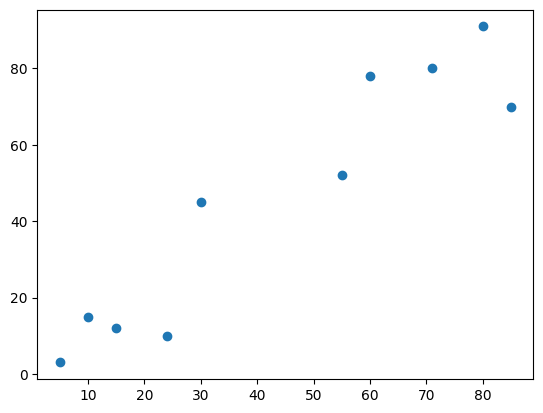

In [57]:
plt.scatter(X[:,0],X[:,1], label='True Position')

In [58]:
# Create clusters
kmeans=KMeans(n_clusters=2)
kmeans.fit(X)

KMeans(n_clusters=2)

In [59]:
# Explore the clusters
print(kmeans.cluster_centers_)
print(kmeans.labels_)

[[70.2 74.2]
 [16.8 17. ]]
[1 1 1 1 1 0 0 0 0 0]


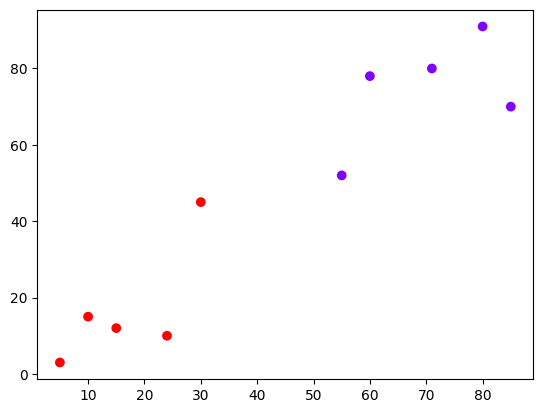

In [60]:
# Visualise k_means with two clusters

plt.scatter(X[:,0], X[: ,1], c=kmeans.labels_, cmap='rainbow')

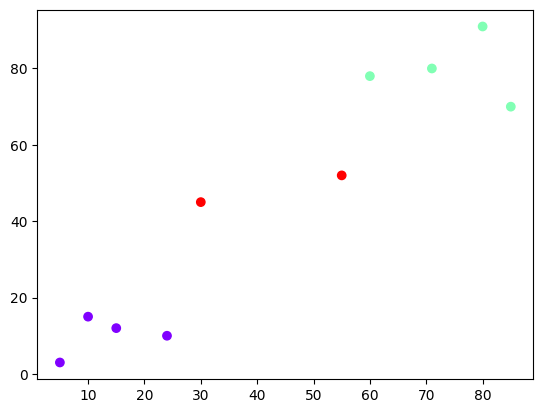

In [61]:
# Try with 3 Clusters
kmeans= KMeans(n_clusters=3)
kmeans.fit(X)
plt.scatter(X[:,0], X[: ,1], c=kmeans.labels_, cmap='rainbow')

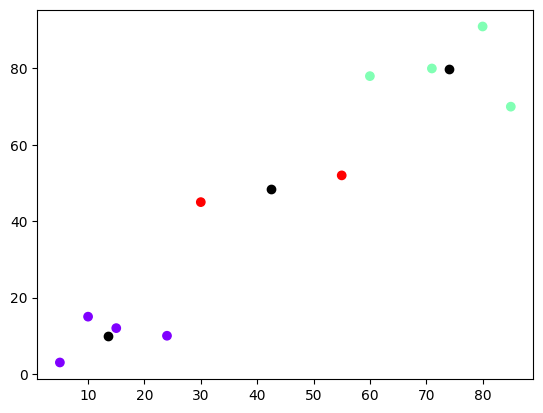

In [62]:
# Visualise with the clusters

plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')


### K nearest neighbour ALgorithm


In [63]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [64]:
url='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

# Assign column names to the dataset
names=['sepal-length','sepal-width','petal-length','petal-width','Class']

# Read dataset to pandas dataframe
dataset = pd.read_csv(url,names=names)
dataset

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [65]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [66]:
x=dataset.iloc[:, :-1].values
y=dataset.iloc[:,4].values


In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.2)

In [68]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [69]:
from sklearn.neighbors import KNeighborsClassifier
classifier= KNeighborsClassifier(n_neighbors=5)

classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [70]:
y_pred= classifier.predict(X_test)

In [71]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.80      1.00      0.89         8
 Iris-virginica       1.00      0.82      0.90        11

       accuracy                           0.93        30
      macro avg       0.93      0.94      0.93        30
   weighted avg       0.95      0.93      0.93        30

[[11  0  0]
 [ 0  8  0]
 [ 0  2  9]]
